In [13]:
import sys, os
from os.path import dirname, join
module_path = join(dirname(os.getcwd()), 'src')
if module_path not in sys.path:
    sys.path.append(module_path)

from TDLambdaSR_model import TDLambdaSR
from plot_utils import plot_trajectory, plot_maze_stats
from utils import calculate_visit_frequency

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [14]:
np.random.seed(40)
N_BOUTS=7
agnt = TDLambdaSR()
ALPHA, BETA, GAMMA, LAMBDA = [0.3, 2, 0.89, 0.8]
success, stats = agnt.simulate(0, [ALPHA, BETA, GAMMA, LAMBDA], max_length=10000, n_bouts_to_generate=N_BOUTS, debug=True)

>>> Simulating: 0 [0.3, 2, 0.89, 0.8] 10000 7
>>> module name: TDLambdaSR_model parent process id: 273 process id: 4431
alpha 0.3, beta 2.0, gamma 0.89, lambda 0.8, agentId 0
0
Home reached. Trial  206
1
Reward consumed. Trial  55
Reward consumed. Trial  358
Reward consumed. Trial  661
Home reached. Trial  803
2
Reward consumed. Trial  173
Reward consumed. Trial  476
Reward consumed. Trial  779
Home reached. Trial  935
3
Home reached. Trial  6
4
Reward consumed. Trial  33
Home reached. Trial  403
5
Home reached. Trial  2
6
Reward consumed. Trial  63
Home reached. Trial  865


In [17]:
[len(stats["episodes_positions"][i]) for i in range(len(stats["episodes_positions"]))]

[206, 803, 935, 6, 403, 2, 865]

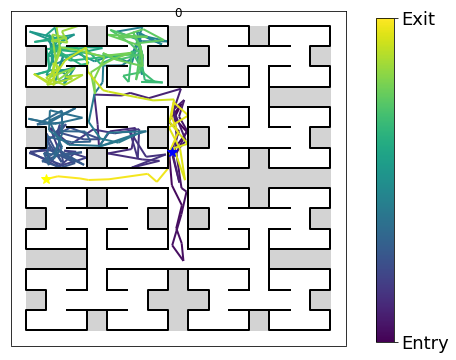

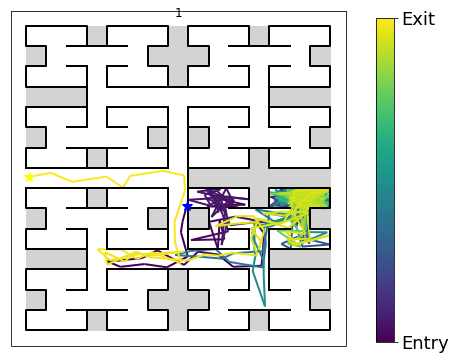

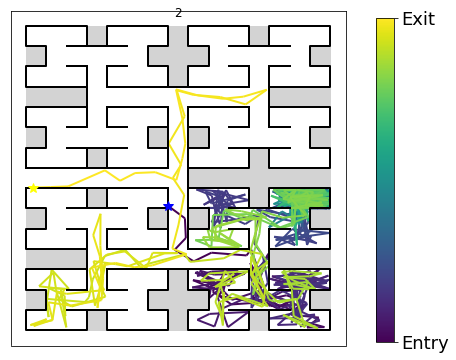

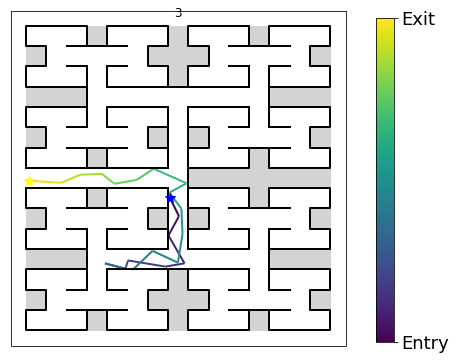

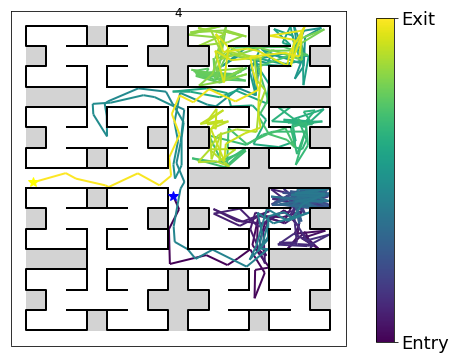

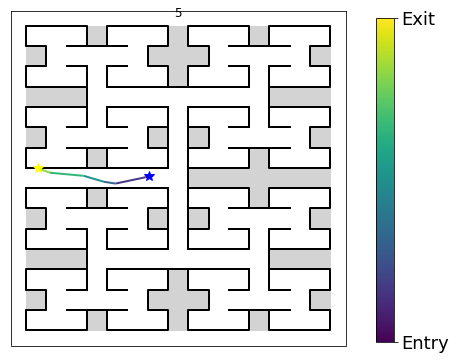

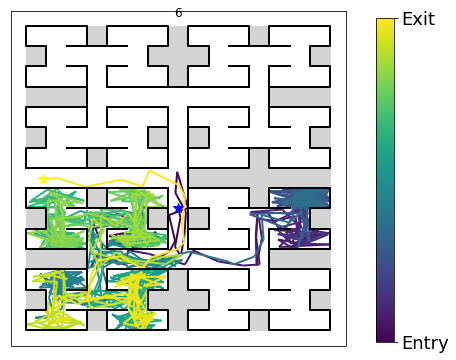

In [4]:
for i in range(N_BOUTS):
    plot_trajectory(stats["episodes_positions"], figtitle=i, episode_idx=i, figsize=(5,5));

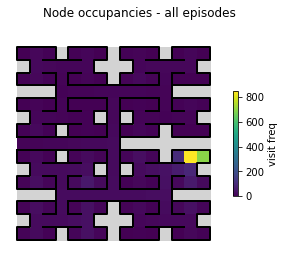

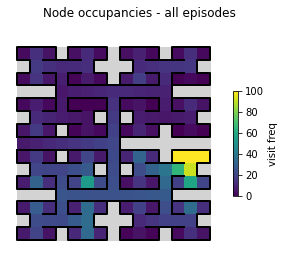

<AxesSubplot:>

In [5]:
plot_maze_stats(calculate_visit_frequency(stats["episodes_positions"]),
                colorbar_label="visit freq", figtitle='Node occupancies - all episodes')

plot_maze_stats(calculate_visit_frequency(stats["episodes_positions"]),
                colorbar_label="visit freq", figtitle='Node occupancies - all episodes', vmax=100)

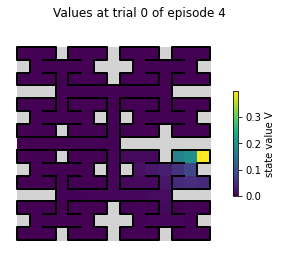

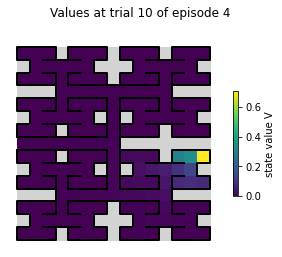

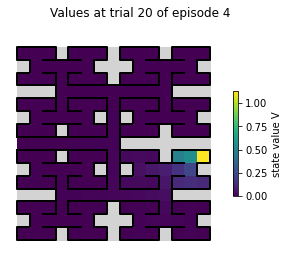

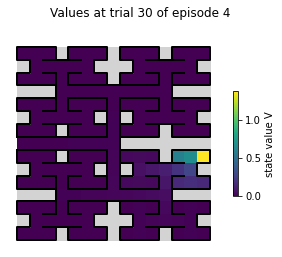

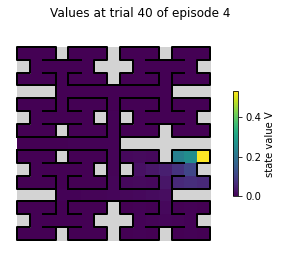

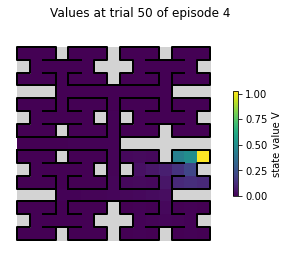

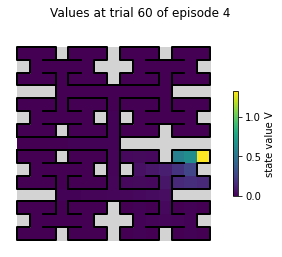

In [18]:
episode_i=4
n_trials = len(stats["value_hists"][episode_i])
for trial in range(0, n_trials, 10):
    plot_maze_stats(stats["value_hists"][episode_i][trial], colorbar_label="state value V",
                    figtitle=f"Values at trial {trial} of episode {episode_i}")
    if trial>50:
        break

(0.0, 1.0)

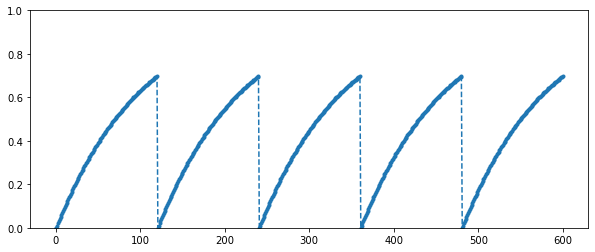

In [12]:
x=0
tau=.01
reset_interval=120
x_hist=[x]
N_STEPS = 600
for i in range(N_STEPS):
    x = x + tau*(1-x)
    if i%reset_interval==0:
        x=0
    x_hist.append(x)

figure(figsize=(10,4))
plot(range(N_STEPS+1), x_hist, '.--')
ylim(0, 1)